### Understanding Requirements

**Profitability KPIs:**
1. **Total Revenue per Customer**: Total revenue generated by each customer.
2. **Average Order Value (AOV)**: Average revenue per order.
3. **Top-Selling Products**: Identify products with the highest sales volume or revenue.
4. **Average. Customer Lifetime Value (CLV)**: Estimate the avg. revenue a customer will generate over their lifetime.
6. **Sales by Country**: Analyze revenue contributions by country to identify high-performing regions.

**Risk Reduction KPIs:**
1. **Cancelled Orders Rate**: Percentage of orders that are canceled (e.g., InvoiceNo starting with 'C').
2. **Stock Turnover Rate**: Measure how quickly inventory is sold and replaced.
3. **Customer Churn Rate**: Percentage of customers who stop purchasing over a given period.
4. **Average Return Orders Per Day** : Average return orders

## Data

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
import sqlalchemy
from sqlalchemy import create_engine, text

### Getting and Knowing the Data

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides. 

In [3]:
data = pd.read_excel("Online Retail.xlsx")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
[col for col in data.columns]

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [7]:
data[data['StockCode']== "D"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [8]:
data[data['StockCode']== 'C2']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
518854,580124,C2,CARRIAGE,1,2011-12-01 17:12:00,50.0,NaN,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE


- InvoiceNo's  have both the order details and also the cancelled order invoices which start with 'C'. The invoice of purchase and cancelled for a particular purchase is not same in terms of the number
- StockCode has 'D' for Discounts and all of them are applied on cancelled orders
- There are also some Invoices with Stock Code 'M' with description Manual where a lot of entries have no CustomerID. Comparing the Data we can ignore M as it is around 10% of the data and it does not talk about specific product
- There are some products with Stock Code samples as well. Not need to track them as well because no specific data is given about them
- The bad debt is adjusted using B as Bad debt which is like unsold inventory
- There is some typo error as well M is written as both M and m

- There are some rows with StockCode C2 mentioned as Carriage which as per my understanding is used for Logistic Fees and Delivery Charges because except of 2 records all of them have Quantity as 1
- Some rows with DOT Stock Code where all the CustomerID's are NULL
- Some with POST Stock Code where some of the CustomerIDs have missing values
- Some of the rows have no customer id's. Keep that in mind for calculating certain KPIs
- Every Entry represents an item. So there can be multiple items in a single Invoice

### Data Exploration

In [9]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
data.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


### Creating Desired Data

In [11]:
data.dropna(subset=['CustomerID'], inplace=True)

In [12]:
data2 = data[~(data['StockCode'].str.lower() == "s") & ~(data['StockCode'].str.lower()=='m') & ~(data['StockCode'].str.lower()=='dot')]

In [13]:
orders = data2[~(data2['InvoiceNo'].str.startswith('C',na=False)) & ~(data2['StockCode']== "D")]
cancelled_orders = data2[(data2['InvoiceNo'].str.startswith('C',na=False))]
discounts = data2[(data2['StockCode']== "D")]

In [14]:
print(orders.shape)
print(cancelled_orders.shape)
print(discounts.shape)

(397618, 8)
(8730, 8)
(77, 8)


In [15]:
orders['NetValue'] = orders['Quantity'] * orders['UnitPrice']
cancelled_orders['NetValue'] = cancelled_orders['Quantity'] * cancelled_orders['UnitPrice']
discounts['NetValue'] = discounts['Quantity'] * discounts['UnitPrice']

- So, Not all orders will be cancelled but for a particular purchase, the invoice no will be different. We can map the it using CustomerID, StockCode. Because of this, we have to do a left join on the orders table because not all orders will be cancelled
- Also as it is evident from the data that all the discounts are on cancelled orders, they have to be joined as well

In [16]:
data3 = pd.merge(orders,cancelled_orders,on=['CustomerID','StockCode','Country'],how='left')

In [17]:
data3.drop(columns=['Description_y'],inplace=True)

In [18]:
data3.fillna(0,inplace=True)

In [19]:
data3

,InvoiceNo_x,StockCode,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID,Country,NetValue_x,InvoiceNo_y,Quantity_y,InvoiceDate_y,UnitPrice_y,NetValue_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,0.0,0,0.0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.0,0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,0.0,0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.0,0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403650,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,0.0,0,0.0,0.0
403651,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,0.0,0,0.0,0.0
403652,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,0.0,0,0.0,0.0
403653,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,0.0,0,0.0,0.0


### Feature Engineering

In [20]:
data3['NetValue'] = data3['Quantity_x'] * data3['UnitPrice_x'] + data3['Quantity_y'] * data3['UnitPrice_y']

In [21]:
data3['NetValue'] = data3['NetValue'].apply(lambda x: round(x,3))

In [20]:
data3

,InvoiceNo_x,StockCode,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID,Country,InvoiceNo_y,Quantity_y,InvoiceDate_y,UnitPrice_y,NetValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0.0,0,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0.0,0,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0.0,0,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0.0,0,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0.0,0,0.0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403650,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,0.0,0,0.0,10.20
403651,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,0.0,0,0.0,12.60
403652,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,0.0,0,0.0,16.60
403653,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,0.0,0,0.0,16.60


## KPI

### Profitability KPI's

#### 1. Total Revenue Per Customer

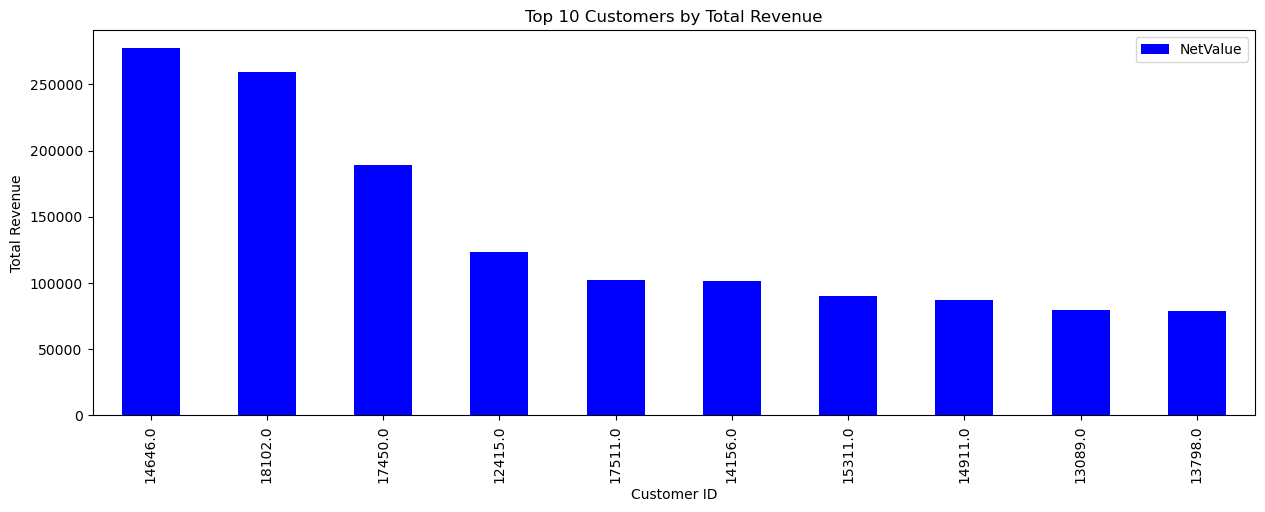

In [22]:
# 1. Total Revenue per Customer (Top 10 Customers)
pd.DataFrame(data3.groupby(by='CustomerID').NetValue.sum().sort_values(ascending=False)).head(10).plot(kind='bar', figsize=(15, 5), color='blue')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

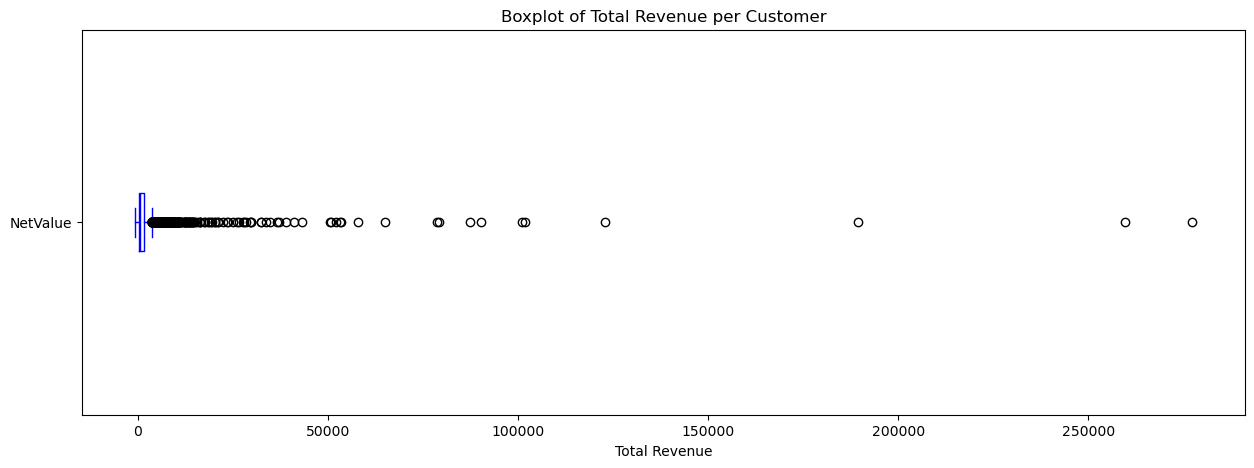

In [ ]:
pd.DataFrame(data3.groupby(by='CustomerID').NetValue.sum().sort_values(ascending=False)).NetValue.plot(kind='box', figsize=(15, 5), color='blue',vert=False)
plt.title('Total Revenue per Customer')
plt.xlabel('Total Revenue')
plt.show()

# The data in terms of revenue is highly skewed. Most filled orders are small (close to few dollars) and some customers have large orders suggesting bulk purchases. Find out what are the products that are bought in bulk. 

#### 2. Average Order Value

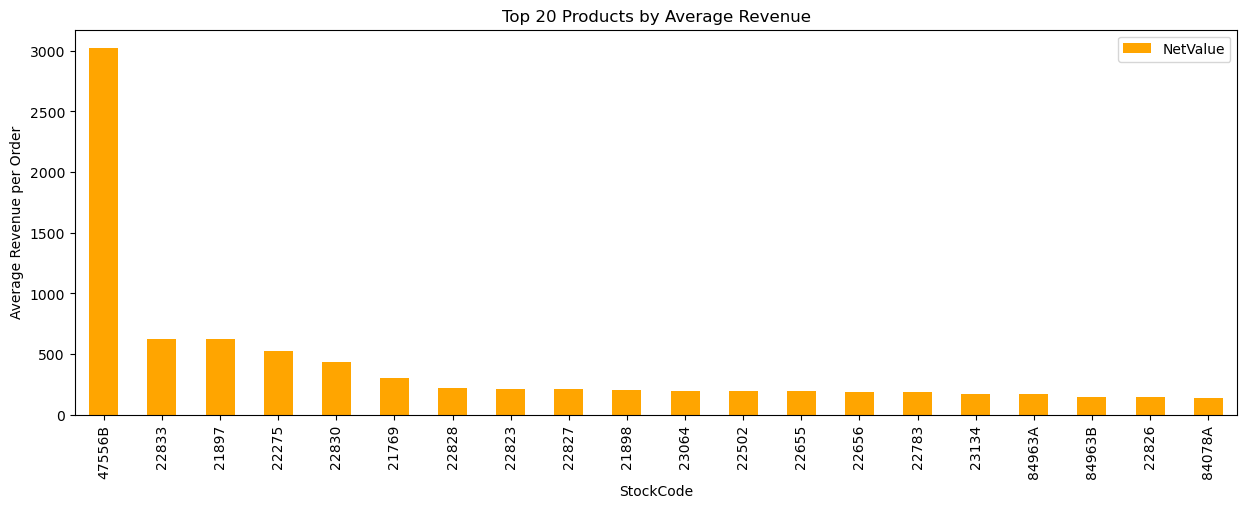

In [36]:
# 2. Average Revenue generated per Product (Top 20 Products)
pd.DataFrame(data3[data3['NetValue']>0].groupby(by='StockCode').NetValue.mean().sort_values(ascending=False)).head(20).plot(kind='bar', figsize=(15, 5), color='orange')
plt.title('Top 20 Products by Average Revenue')
plt.xlabel('StockCode')
plt.ylabel('Average Revenue per Order')
plt.show()

# Comparing this graph and the graph below, average revenue per Product is high for StockCode '47556B' 

#### 3. Top Selling Product

In [ ]:
data3.groupby(by='StockCode')[['Invoice']]

,InvoiceNo_x,StockCode,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID,Country,NetValue_x,InvoiceNo_y,Quantity_y,InvoiceDate_y,UnitPrice_y,NetValue_y,NetValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,0.0,0,0.0,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.0,0,0.0,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,0.0,0,0.0,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.0,0,0.0,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.0,0,0.0,0.0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403650,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,0.0,0,0.0,0.0,10.20
403651,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,0.0,0,0.0,0.0,12.60
403652,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,0.0,0,0.0,0.0,16.60
403653,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,0.0,0,0.0,0.0,16.60


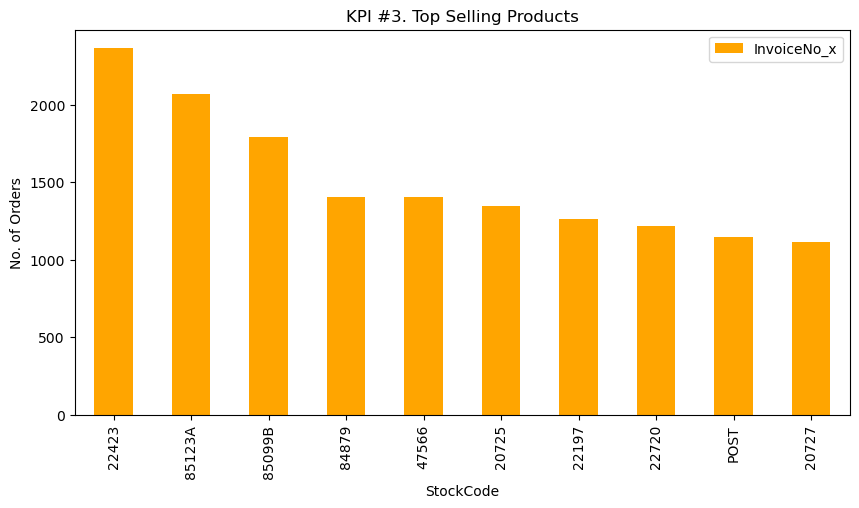

In [35]:
# 3. Top 10 Most Selling Product
pd.DataFrame(data3.groupby(by='StockCode').InvoiceNo_x.count().sort_values(ascending=False).head(10)).plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('KPI #3. Top Selling Products')
plt.xlabel('StockCode')
plt.ylabel('No. of Orders')
plt.show()



#### 4. Sales by Country

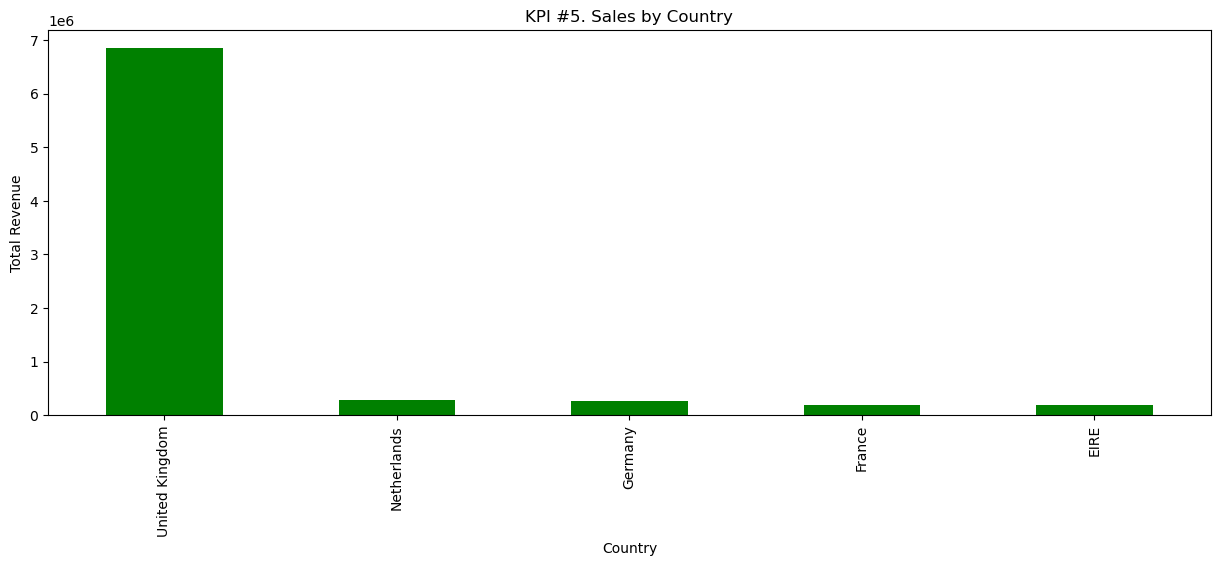

Most of the sales comes from United Kingdom which is 6844082.414


In [34]:
#5. Sales by Country (Top 5)
data3.groupby(by='Country').NetValue.sum().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(15, 5), color='green')
plt.title('KPI #5. Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

print('Most of the sales comes from',f'{pd.DataFrame(data3.groupby(by='Country').NetValue.sum().sort_values(ascending=False)).reset_index().iloc[0,0]}',"which is",f'{pd.DataFrame(data3.groupby(by='Country').NetValue.sum().sort_values(ascending=False)).reset_index().iloc[0,1]}')

### RISK KPIs

#### 1. Avg Sells and Returns 

In [37]:
orders['Day of Week'] = orders['InvoiceDate'].dt.day_of_week
orders['Day of Week'] = orders['Day of Week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
orders['Day of Month'] = orders['InvoiceDate'].dt.month_name()

cancelled_orders['Day of Week'] = cancelled_orders['InvoiceDate'].dt.day_of_week
cancelled_orders['Day of Week'] = cancelled_orders['Day of Week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
cancelled_orders['Day of Month'] = cancelled_orders['InvoiceDate'].dt.month_name()

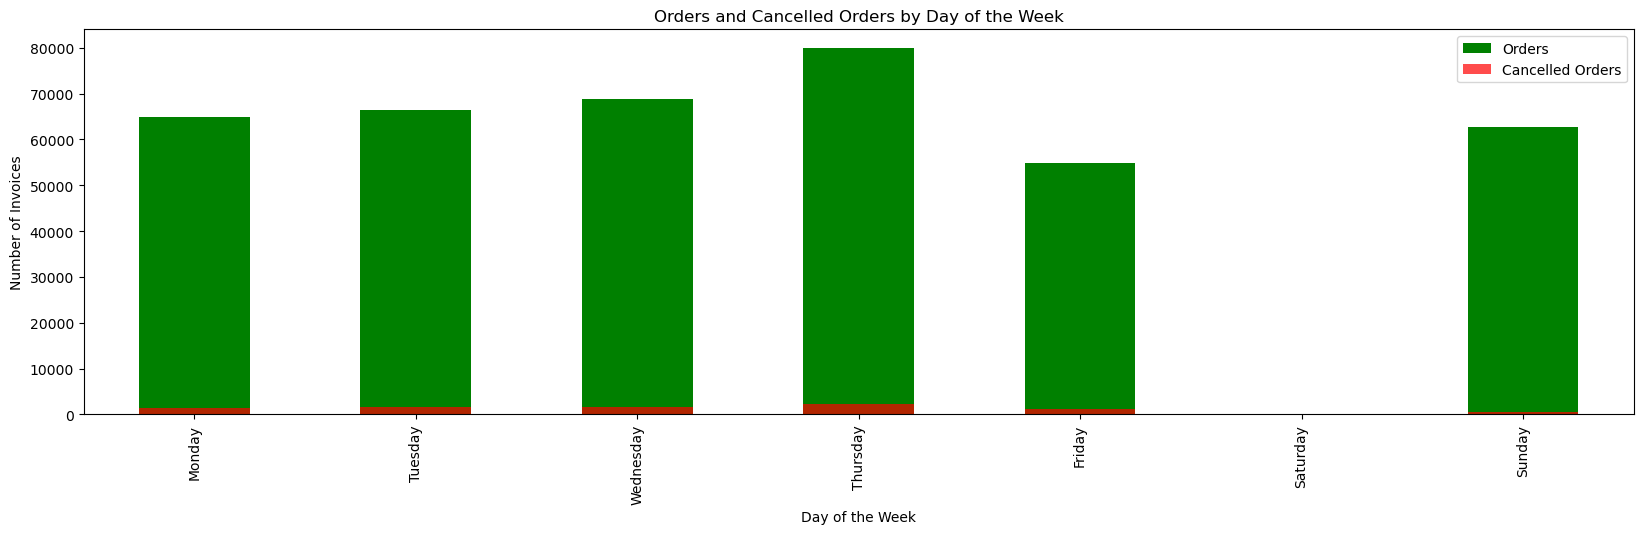

In [38]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders['Day of Week'] = pd.Categorical(orders['Day of Week'], categories=day_order, ordered=True)
cancelled_orders['Day of Week'] = pd.Categorical(cancelled_orders['Day of Week'], categories=day_order, ordered=True)


orders.groupby(by='Day of Week').InvoiceNo.count().plot(kind='bar', figsize=(20, 5), color='green', label='Orders')
cancelled_orders.groupby(by='Day of Week').InvoiceNo.count().plot(kind='bar', figsize=(20, 5), color='red', alpha=0.7, label='Cancelled Orders')

plt.legend()
plt.title('Orders and Cancelled Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Invoices')
plt.show()

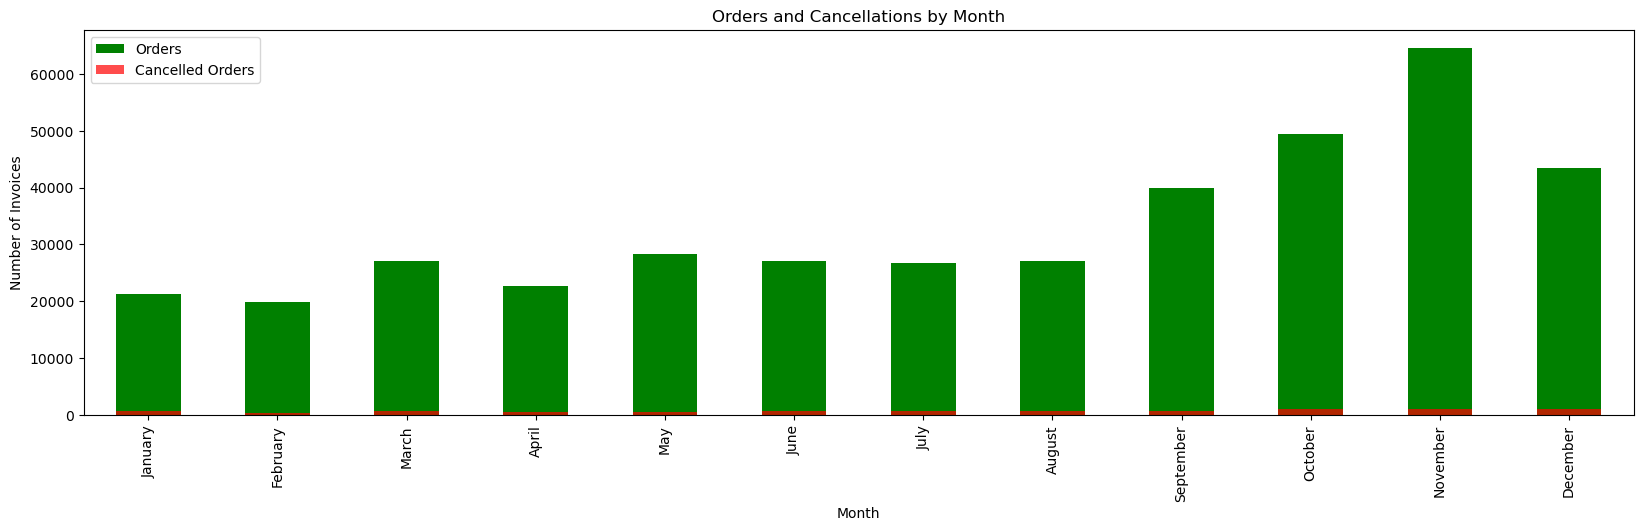

In [39]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
orders['Day of Month'] = pd.Categorical(orders['Day of Month'], categories=month_order, ordered=True)
cancelled_orders['Day of Month'] = pd.Categorical(cancelled_orders['Day of Month'], categories=month_order, ordered=True)

orders.groupby(by='Day of Month').InvoiceNo.count().plot(kind='bar', figsize=(20, 5), color='green')
cancelled_orders.groupby(by='Day of Month').InvoiceNo.count().plot(kind='bar', figsize=(20, 5), color='red', alpha=0.7)

plt.title('Orders and Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.legend(['Orders', 'Cancelled Orders'])
plt.show()
# Orders and Cancellations by Month

#### 2. Product Return Rate (Particular Product returned/Particular Product Sold in Total)

In [33]:
# 2. Product Return Rate (Particular Product returned/Particular Product Sold in Total)
returns = pd.DataFrame(data[data['Quantity']<0].groupby(by=['StockCode']).Quantity.sum())
sold = pd.DataFrame(data[data['Quantity']>0].groupby(by=['StockCode']).Quantity.sum())
return_rate = pd.merge(sold,returns,on=['StockCode'],how='left').fillna(0)
return_rate['ReturnRate'] = return_rate['Quantity_y'] / return_rate['Quantity_x']
return_rate['ReturnRate'] = 100*(return_rate['ReturnRate'].apply(lambda x: round(x,3)))
return_rate.reset_index(inplace=True)
return_rate.set_index('StockCode', inplace=True)

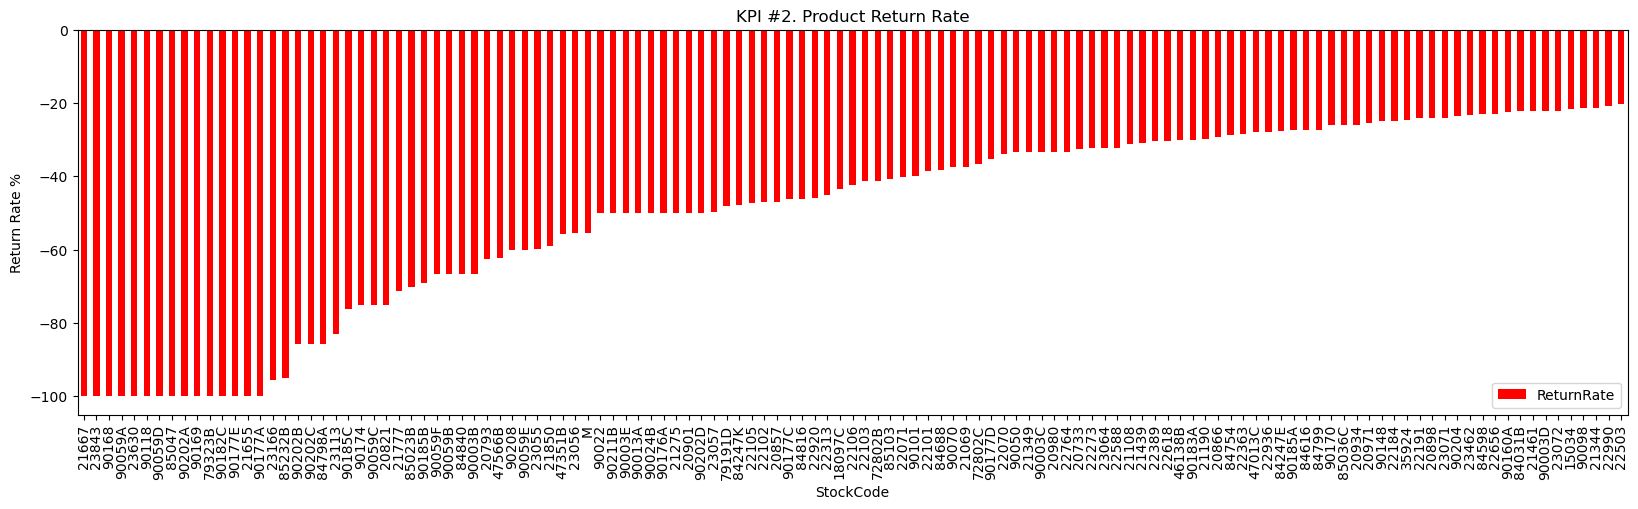

In [34]:
return_rate[(return_rate['ReturnRate'] < -20) & (return_rate['ReturnRate'] >= -100)].iloc[:, [2]].sort_values(by='ReturnRate').plot(kind='bar', figsize=(20, 5), color='red')
plt.title('KPI #2. Product Return Rate')
plt.xlabel('StockCode')
plt.ylabel('Return Rate %')
plt.show()


#### 3. High % Risk Product Per Country 

In [36]:
# 3. High % Risk Product Per Country 
returns2 = pd.DataFrame(data[data['Quantity']<0].groupby(by=['Country']).Quantity.sum())
sold2 = pd.DataFrame(data[data['Quantity']>0].groupby(by=['Country']).Quantity.sum())
return_rate2 = pd.merge(sold2,returns2,on=['Country'],how='left').fillna(0)
return_rate2['ReturnRate'] = return_rate2['Quantity_y'] / return_rate2['Quantity_x']
return_rate2['ReturnRate'] = 100*(return_rate2['ReturnRate'].apply(lambda x: round(x,3)))

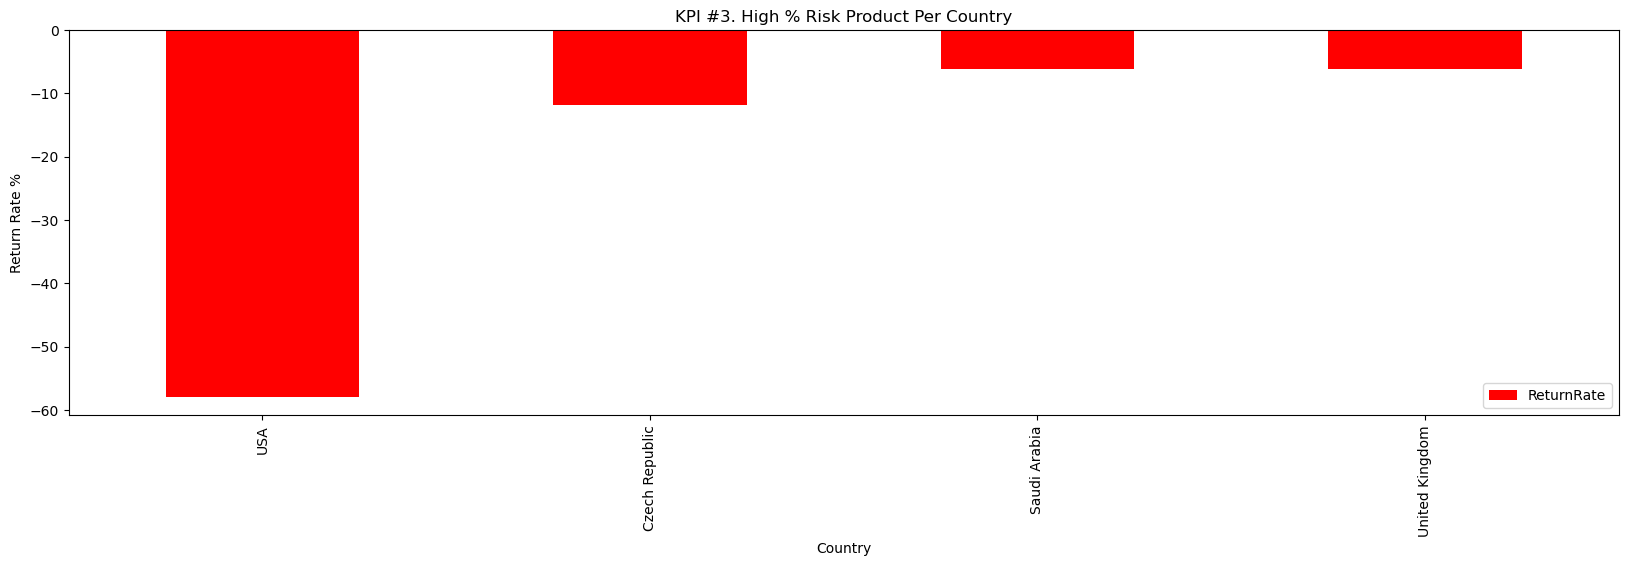

In [ ]:
return_rate2[(return_rate2['ReturnRate'] < -5)].iloc[:, [2]].sort_values(by='ReturnRate').plot(kind='bar', figsize=(20, 5), color='red')
plt.title('KPI #3. High % Risk Product Per Country')
plt.xlabel('Country')
plt.ylabel('Return Rate %')
plt.show()

# Out of all orders to USA, 60% of the orders are returned.

#### 4. Average Return Orders per Country

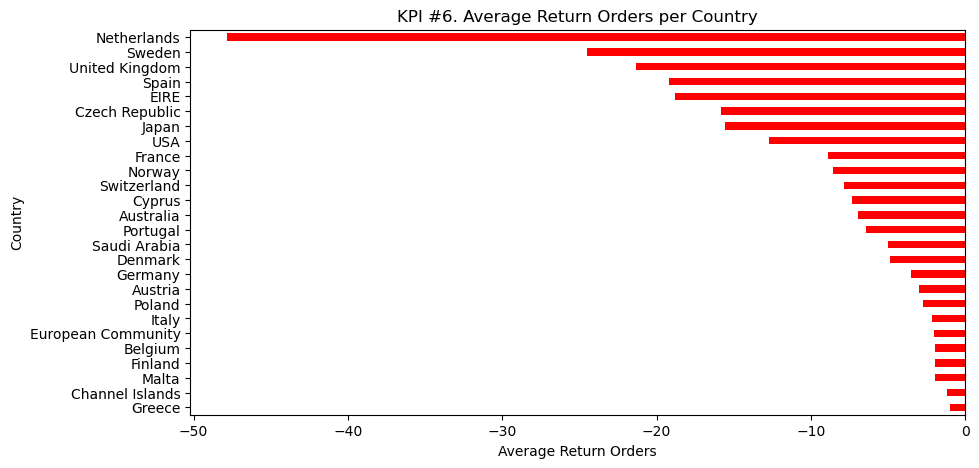

In [38]:
# 6. Average Return orders per country
data3[data3['Quantity_y']< 0].groupby(by='Country').Quantity_y.mean().sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), color='red')
plt.title('KPI #6. Average Return Orders per Country')
plt.xlabel('Average Return Orders')
plt.ylabel('Country')
plt.show()

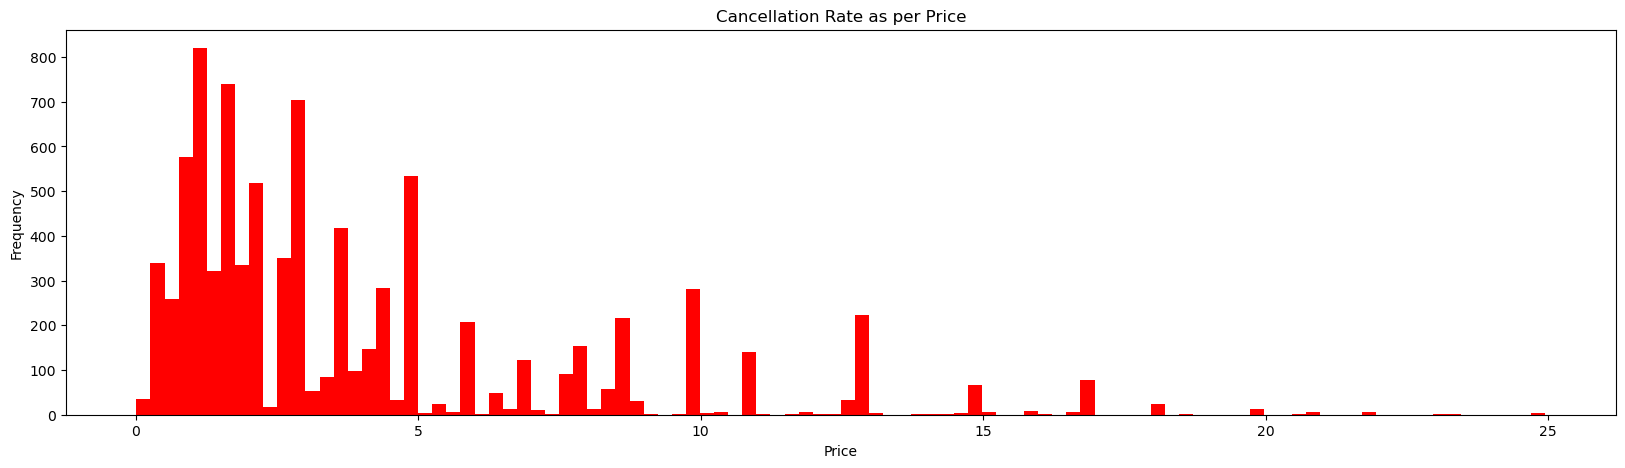

In [181]:
# Cancellation Rate as per price 
cancelled_orders[cancelled_orders['UnitPrice'] < 25]['UnitPrice'].plot(kind='hist', bins=100, figsize=(20, 5), color='red')
plt.title('Cancellation Rate as per Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Most of the cancelled orders are below 5. So price can be a factor for cancellation but quality can be a factor

## Analysis using SQL

In [156]:
def sqlquery(text):
    global session
    return pd.read_sql(text, con=session)

In [50]:
session = create_engine('sqlite:///OnlineRetail.db')
data.to_sql('OnlineRetail', con=session, if_exists='replace', index=False)

406829

In [51]:
data['InvoiceDate'] = data['InvoiceDate'].astype(str)

In [ ]:
sqlquery("SELECT * FROM OnlineRetail")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00.000000,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00.000000,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00.000000,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00.000000,4.15,12680.0,France


In [ ]:
sqlquery("SELECT CustomerID, Country, AVG(Quantity) FROM OnlineRetail WHERE Quantity >0 GROUP BY CustomerID ")

,CustomerID,Country,AVG(Quantity)
0,12346.0,United Kingdom,74215.000000
1,12347.0,Iceland,13.505495
2,12348.0,Finland,75.516129
3,12349.0,Italy,8.643836
4,12350.0,Norway,11.588235
...,...,...,...
4334,18280.0,United Kingdom,4.500000
4335,18281.0,United Kingdom,7.714286
4336,18282.0,United Kingdom,8.583333
4337,18283.0,United Kingdom,1.847884


In [160]:
sqlquery("SELECT *, DATE(InvoiceDate) AS DateValue FROM OnlineRetail")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00.000000,0.85,12680.0,France,2011-12-09
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00.000000,2.10,12680.0,France,2011-12-09
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00.000000,4.15,12680.0,France,2011-12-09
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00.000000,4.15,12680.0,France,2011-12-09


In [162]:
'''query = text("WITH TempTable AS "
"(SELECT *, DATE(InvoiceDate) AS DateValue, strftime('%W',InvoiceDate) AS WeekNo FROM OnlineRetail WHERE Quantity>0) " \
"SELECT CustomerID,Country, DateValue, WeekNo, SUM(Quantity*UnitPrice) As TotalSoldValue FROM TempTable GROUP BY CustomerID, DateValue HAVING TotalSoldValue > 100 ORDER BY DateValue")
weeksales = pd.read_sql(query, con=session)'''
weeklysales = sqlquery("WITH TempTable AS "
"(SELECT *, DATE(InvoiceDate) AS DateValue, strftime('%W',InvoiceDate) AS WeekNo FROM OnlineRetail WHERE Quantity>0) " \
"SELECT CustomerID,Country, DateValue, WeekNo, SUM(Quantity*UnitPrice) As TotalSoldValue FROM TempTable GROUP BY CustomerID, DateValue HAVING TotalSoldValue > 100 ORDER BY DateValue")

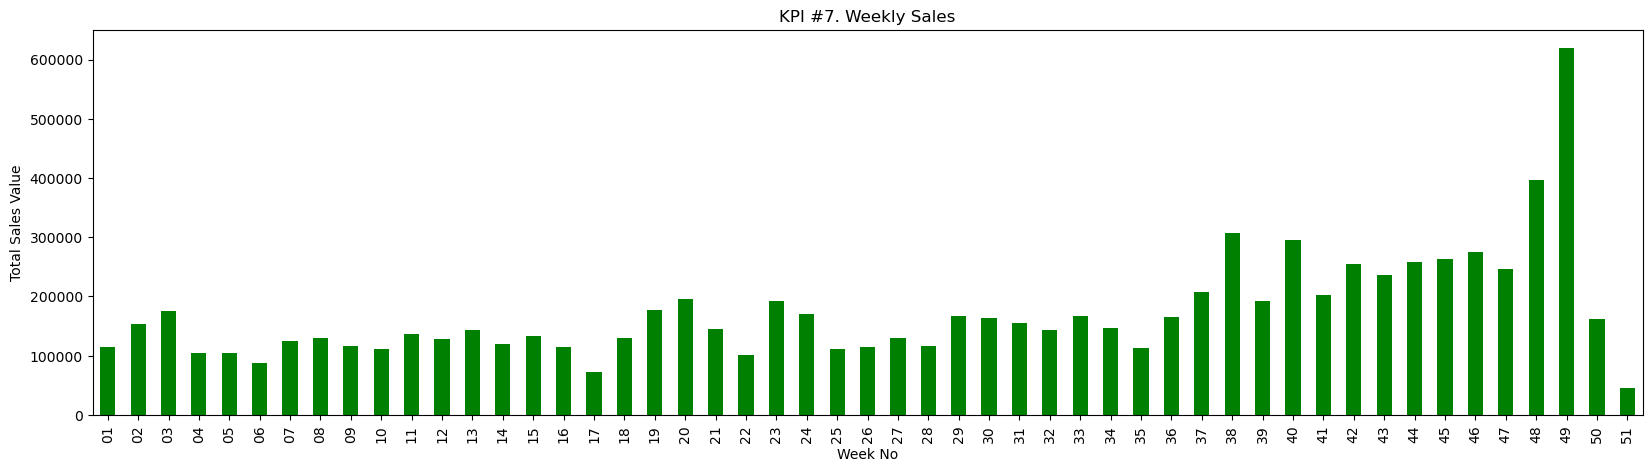

In [164]:
weeklysales.groupby(by='WeekNo').TotalSoldValue.sum().plot(kind='bar', figsize=(20, 5), color='green')
plt.title('KPI #7. Weekly Sales')
plt.xlabel('Week No')
plt.ylabel('Total Sales Value')
plt.show()

# Generally the sales are increasing the week by week and tend to be the maximum in the last 3-4 months of the year.

In [ ]:
# Looking at the data, the store should focus on United Kingdom first as it is the country with the most sales and least returns which will solve the problem of return stock

In [165]:
sqlquery("SELECT InvoiceNo, CustomerID, COUNT(StockCode) As ProductsPerOrder FROM OnlineRetail WHERE StockCode NOT IN ('D','C2') GROUP BY InvoiceNo, CustomerID ORDER BY ProductsPerOrder DESC").head(200)

,InvoiceNo,CustomerID,ProductsPerOrder
0,576339,14096.0,542
1,579196,14096.0,533
2,580727,14096.0,529
3,578270,14096.0,442
4,573576,14096.0,435
...,...,...,...
195,573373,14684.0,109
196,577855,15877.0,109
197,578942,17288.0,109
198,546670,13451.0,108


<Axes: >

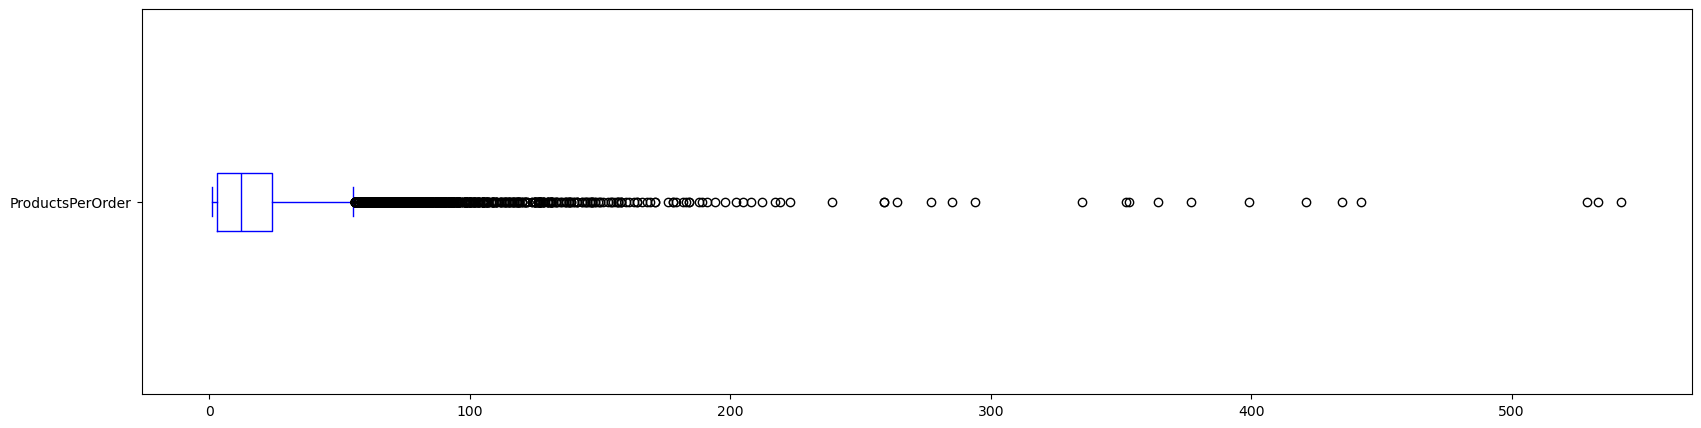

In [ ]:
sqlquery("SELECT InvoiceNo, CustomerID, COUNT(StockCode) As ProductsPerOrder FROM OnlineRetail WHERE StockCode NOT IN ('D','C2') GROUP BY InvoiceNo, CustomerID ORDER BY ProductsPerOrder DESC").ProductsPerOrder.plot(kind='box', figsize=(20, 5), color='blue',vert=False)
# On average, 18 unique items are ordered per order. Looking at the data, there are consumers who are retailers as well as wholesalers.

### Daily Cumulative Sales

In [ ]:
trends = sqlquery(f"WITH NewTable AS (SELECT *, DATE(InvoiceDate) As Date FROM OnlineRetail WHERE StockCode NOT IN ('D','M','POST','C2','CRUK','DOT')) SELECT StockCode, Date, SUM(Quantity) OVER(PARTITION BY StockCode ORDER BY Date) As DailyTrend, UnitPrice FROM NewTable WHERE UnitPrice > 50 ORDER BY UnitPrice DESC")
trends = trends.sort_values(by='Date')

Text(0, 0.5, 'Cumulative Daily Sales')

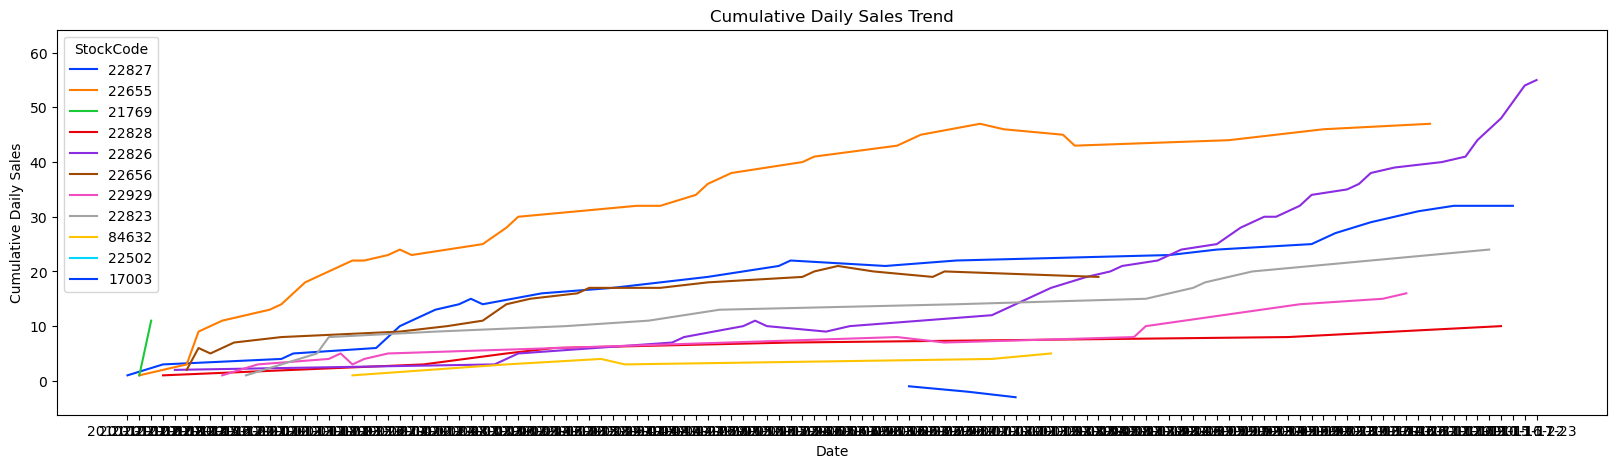

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=trends, x='Date', y='DailyTrend', hue='StockCode', palette='bright')
plt.title('Cumulative Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Cumulative Daily Sales')
# Cumulative Daily Sales Trend and finding phased out products suggesting some of the products like 22822 have phased out and 22826 is gaining traction.

### Weekly Cumulative Sales

In [ ]:
weektrends = sqlquery("WITH NewTable AS (SELECT StockCode, UnitPrice, SUM(Quantity) AS WeeklyQ, strftime('%W', InvoiceDate) AS Week FROM OnlineRetail WHERE StockCode NOT IN ('D','M','POST','C2','CRUK','DOT') GROUP BY StockCode, Week) SELECT StockCode, Week, SUM(WeeklyQ) OVER(PARTITION BY StockCode ORDER BY Week) As WeeklyTrend, UnitPrice FROM NewTable WHERE UnitPrice > 100")
weektrends = weektrends.sort_values(by='Week')

# Weekly Sales Trend and finding phased out products

Text(0, 0.5, 'Weekly Sales Trend')

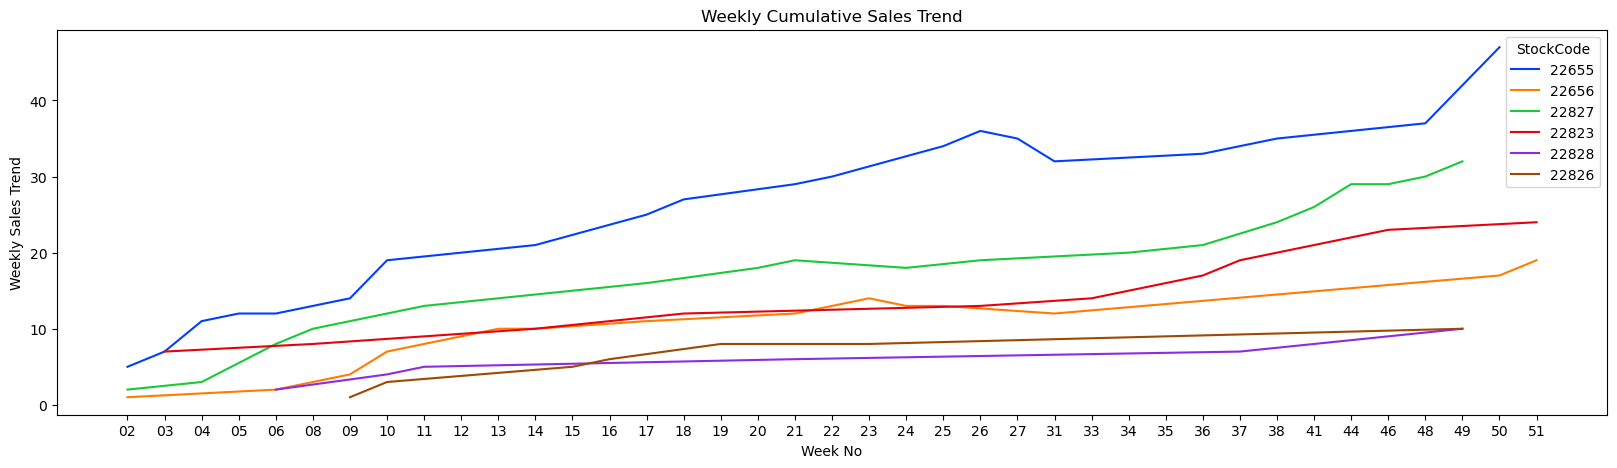

In [177]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=weektrends, x='Week', y='WeeklyTrend', hue='StockCode', palette='bright')
# Weekly Cumulative Sales Trend for the products with price > 100. The trend is increasing for the first 10 weeks and then decreasing. The product is phased out after 10 weeks.
plt.title('Weekly Cumulative Sales Trend')
plt.xlabel('Week No')   
plt.ylabel('Weekly Sales Trend')